In [1]:
#importing libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

In [2]:
# value iteration algorithm
class ValueIteration():
    """
    Value Iteration
    - In the paper, the states are represented by 1-based indexing
    - In the code, we will be using 0-based indexing
    """

    def __init__(self, exp_info = {}):
        """Initialization method for the class"""

        # Defining the number of states & actions
        self.num_states  = 4
        self.num_actions = 2
        # {'Stay' : 0 , 'Leave' : 1}

        # Defining the rewards
        # Reward structure if agent decides to leave the state.
        self.rewards_leave = np.array([2,1,3,10])
        # Reward structure if agents decides to stay in the state
        self.rewards_stay = np.array([3,2,1,0])

        # Defining the transition probabilities {p(s'|s, a)}
        
        self.tran_probs = np.ones((2, 4, 4))
        # Transition prbability matrix for action 'Stay' (0)
        self.tran_probs[0, :, :] = np.array([ 
          [1,0,0,0],
          [0.2,0.8,0,0],
          [0,0.2,0.8,0],
          [0,0,0.2,0.8]
         ])
        # Transition prbability matrix for action 'Leave' (1)
        self.tran_probs[1, :, :] =  np.array([ 
          [0,0.2,0.3,0.5],
          [0.5,0,0.5,0],
          [0,0.5,0,0.5],
          [0,0.5,0.5,0]
         ])

        # Defining a random generator
        self.rng = np.random.RandomState(exp_info.get("seed", 0))

        # Defining the experiment parameters
        self.delta     = exp_info.get("delta", 1e-2)
        self.max_iters = exp_info.get("max_iters", 100)
        

        # Initializing the state values
        self.s_vals = np.zeros(self.num_states)

    def iterate(self, discount):
        """Performs the iterations over the state space"""

        # Initializing some variables
        n = 0
        l_s_vals = []
        temp_delta = self.delta

        while temp_delta >= self.delta and n < self.max_iters:
            temp_delta = 0

            for s in range(self.num_states):
                max_val = 1e-5
                for a in range(self.num_actions):
                    # Calculating the value for a (S, A) pair
                    temp_val = 0
                    for s_prime in range(self.num_states):
                        # State value if agent decides to stay(action =0)
                        if a == 0:
                            temp_val += self.tran_probs[a, s, s_prime] * (
                            self.rewards_stay[s] + discount * self.s_vals[s_prime]
                        )
                        # State value if agent decides to leave(action =1)
                        else:
                            temp_val += self.tran_probs[a, s, s_prime] * (
                            self.rewards_leave[s] + discount * self.s_vals[s_prime]
                        )
                        
                    max_val = max(max_val, temp_val)

                temp_delta = max(temp_delta, abs(max_val - self.s_vals[s]))
                self.s_vals[s] = max_val

            n += 1
            l_s_vals.append(copy.deepcopy(self.s_vals))

            ### DEBUG CODE
            # print(temp_delta, self.s_vals)

        return self.s_vals, np.array(l_s_vals)

In [3]:
# Plot the function
def plot_s_vals_1(l_s_vals):
    # Extracting the required information
    num_iters = len(l_s_vals)
    num_states = len(l_s_vals[0])

    plt.figure(figsize = (10, 5))

    # Plotting the State Values
    for s in range(num_states):
        plt.plot(range(num_iters), l_s_vals[ : , s], label = f"State {s + 1}: {np.round(l_s_vals[-1, s], 3)}")

    plt.xticks(range(0, num_iters, num_iters // 5))
    plt.title(f"Trend of Learnt State Values over Iterations", pad = 10)
    plt.xlabel("Iterations", labelpad = 10)
    plt.ylabel("Learnt State Value", labelpad = 10)
    plt.legend(loc = 'upper left')
    plt.show()

Number of Iterations -> 16
Value iteration for discount factor = 0.8


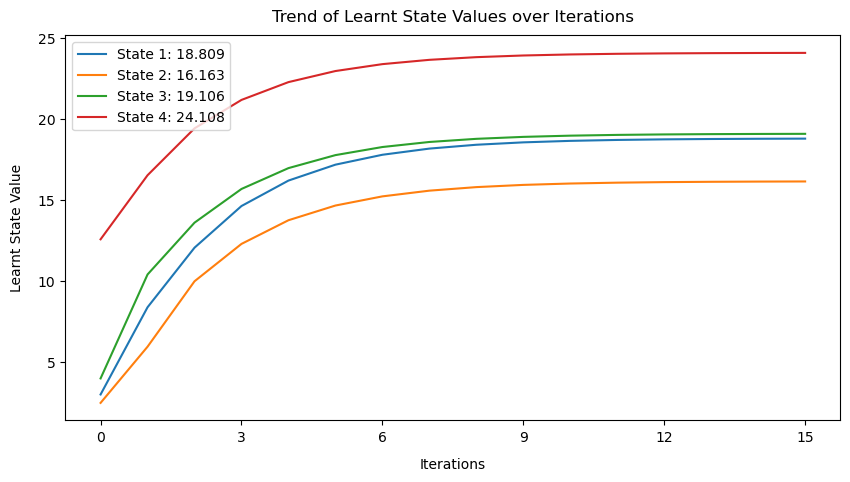

Number of Iterations -> 7
Value iteration for discount factor = 0.5


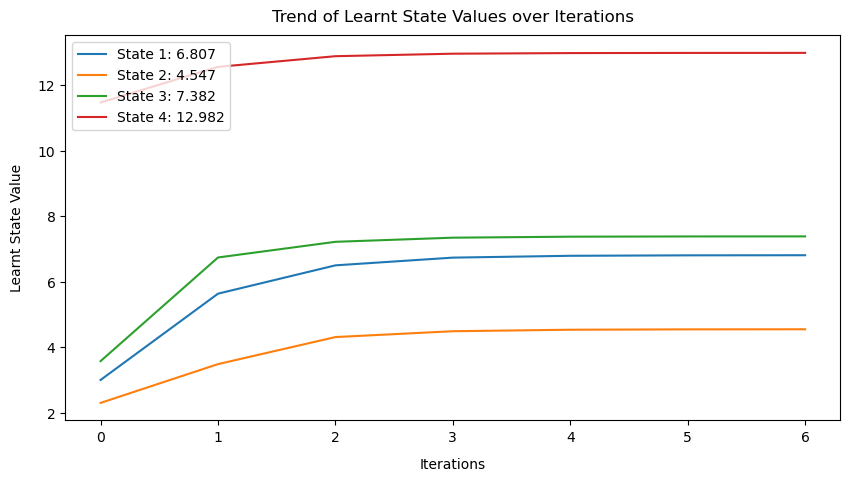

In [4]:
# feed the parameter and run value iteration algorithm
exp_info = {
    'delta': 1e-2,
    'max_iters': 500,
}
# Initializing a list with different values of discount factor
discount_factor = [0.8,0.5]
# Running value iteration for different values of discount factor
for beta in discount_factor:
    env = ValueIteration(exp_info)
    s_vals, ValIter_s_vals = env.iterate(beta)
    num_iters = len(ValIter_s_vals)
    print(f"Number of Iterations -> {num_iters}")
    print('\033[1m' + f"Value iteration for discount factor = {beta}" + '\033[0m')

    # Plotting the State Values
    plot_s_vals_1(ValIter_s_vals)

In [5]:
class QLearn():
    """
    Q-Learning
    - In the paper, the states are represented by 1-based indexing
    - In the code, we will be using 0-based indexing
    """

    def __init__(self, exp_info = {}):
        """Initialization method for the class"""

        # Defining the number of states & actions
        self.num_states  = 4
        self.num_actions = 2
        # {'Stay' : 0 , 'Leave' : 1}

        # Defining the rewards
        # Reward structure if agent decides to leave the state.
        self.rewards_leave = np.array([2,1,3,10])
        # Reward structure if agents decides to stay in the state
        self.rewards_stay = np.array([3,2,1,0])

        # Defining the transition probabilities {p(s'|s, a)}
        
        self.tran_probs = np.ones((2, 4, 4))
        # Transition prbability matrix for action 'Stay' (0)
        self.tran_probs[0, :, :] = np.array([ 
          [1,0,0,0],
          [0.2,0.8,0,0],
          [0,0.2,0.8,0],
          [0,0,0.2,0.8]
         ])
        # Transition prbability matrix for action 'Leave' (1)
        self.tran_probs[1, :, :] =  np.array([ 
          [0,0.2,0.3,0.5],
          [0.5,0,0.5,0],
          [0,0.5,0,0.5],
          [0,0.5,0.5,0]
         ])

        # Defining a random generator
        self.rng = np.random.RandomState(exp_info.get("seed", 0))

        # Initializing the action values and the state
        self.q_vals = np.zeros((self.num_states, self.num_actions))
        self.cur_state = 0

        # Defining the experiment parameters
        self.step_size    = exp_info.get("step_size", 0.1)
        self.delta        = exp_info.get("delta", 1e-2)
        self.eps          = exp_info.get("epsilon", 0.2)
        self.max_iters    = exp_info.get("max_iters", 100)
        self.warmup_iters = exp_info.get("warmup_iters", 10)

    def _step(self):
        """
        Returns a tuple: (S, A, R, S')
        - We will choose the action using an epsilon-greedy policy derived from q
        """

        temp = self.rng.rand()

        # Exploratory action
        if temp <= self.eps:
            chosen_action = self.rng.choice(self.num_actions)

        # Exploitary action
        else:
            cur_pi = np.argmax(self.q_vals, axis = -1)
            chosen_action = cur_pi[self.cur_state]
        
        # Reward if action chosen is 'Stay'(0)
        if chosen_action == 0:
            reward = self.rewards_stay[self.cur_state]
        # Reward if action chosen is 'Leave'(1)
        else:
            reward = self.rewards_leave[self.cur_state]
            
            
        
        next_state = self.rng.choice(self.num_states, p = self.tran_probs[chosen_action, self.cur_state, :])
        prev_state = copy.copy(self.cur_state)
        self.cur_state = next_state

        return (prev_state, chosen_action, reward, next_state)


    def iterate(self, discount):
        """Performs the iterations over the state space"""

        # Initialization of the required variables
        n = 0
        l_s_vals = []
        temp_delta = self.delta

        while n < self.max_iters and (n < self.warmup_iters or \
           (n >= self.warmup_iters and temp_delta >= self.delta)):

            # Taking a single step
            s, a, r, s_prime = self._step()

            # Computing the action value if action is 'Stay'(0)
            if a == 0:
                new_val = self.q_vals[s, a] + self.step_size * (
                self.rewards_stay[s] + discount * np.max(self.q_vals[s_prime, :]) - \
                self.q_vals[s, a]
            )
            # Computing the action value if action is 'Leave'(1)
            else:
                new_val = self.q_vals[s, a] + self.step_size * (
                self.rewards_leave[s] + discount * np.max(self.q_vals[s_prime, :]) - \
                self.q_vals[s, a]
            )
            

            # Updating the delta, index and action value
            n += 1
            temp_delta = abs(new_val - self.q_vals[s, a])
            self.q_vals[s, a] = new_val

            if n % (self.max_iters // 100) == 0:
                s_vals = np.max(self.q_vals, axis = -1)
                l_s_vals.append(s_vals)


        return self.q_vals, np.array(l_s_vals), n

In [6]:
def plot_s_vals_2(ValIter_s_vals, QLearn_s_vals, label1, label2):
    num_states = len(ValIter_s_vals[0])

    plt.figure(figsize = (7, 4))
    plt.bar(range(num_states), ValIter_s_vals[-1], width = -0.15, color = 'gold',
        align = 'edge', label = label1)
    plt.bar(range(num_states), QLearn_s_vals[-1], width = 0.15, color = 'darkorange',
        align = 'edge', label = label2)
    plt.xticks(range(num_states), range(1, num_states + 1))
    plt.title("Comparing the learnt state values")
    plt.xlabel("States", labelpad = 10)
    plt.ylabel("Learnt State Values", labelpad = 10)
    plt.legend()
    plt.show()

Number of Iterations -> 100000
Policy -> [1 1 1 1]
Value iteration and comparison of learnt state values for discount factor = 0.8


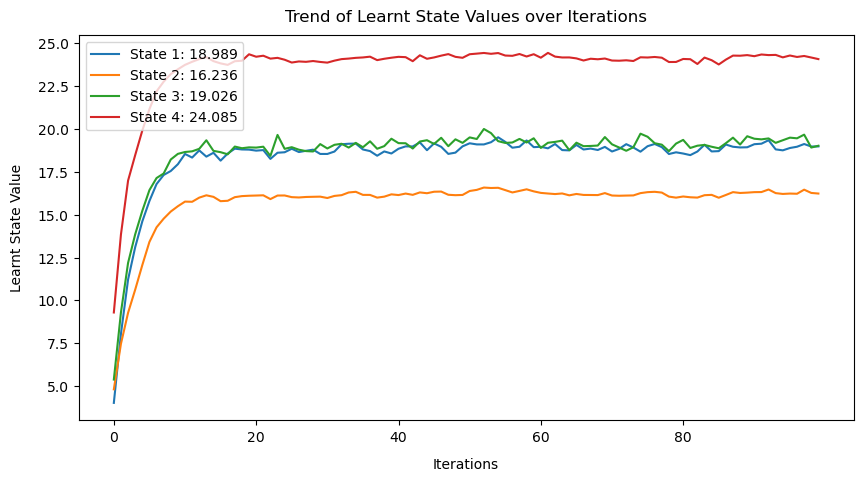

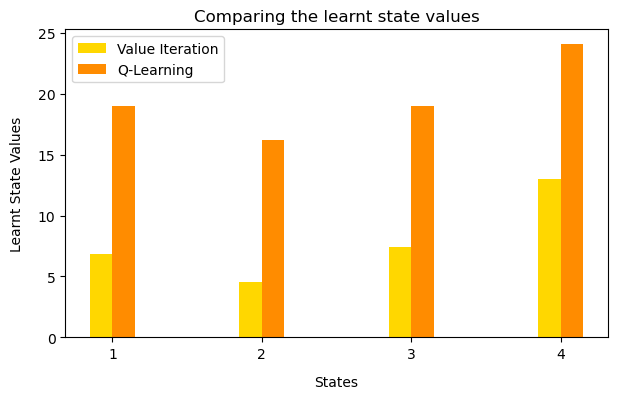

Number of Iterations -> 100000
Policy -> [1 0 1 1]
Value iteration and comparison of learnt state values for discount factor = 0.5


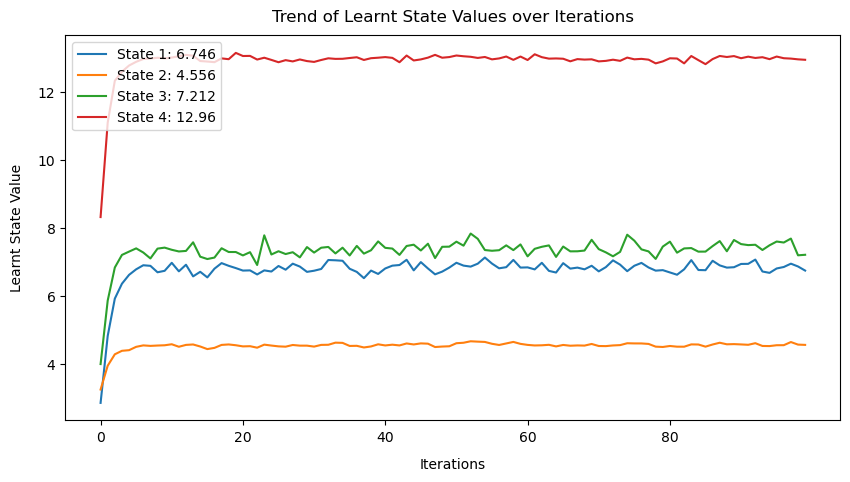

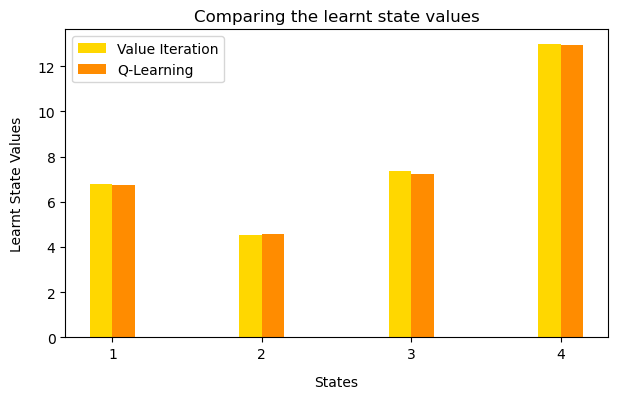

In [7]:
exp_info = {
    'delta': 1e-2,
    'max_iters': 1e5,
    'epsilon': 0.5,
    'step_size': 0.01,
    'warmup_iters': 1e5,
}
#Running Q-Learning algorithm for different values of discount factor
for beta in discount_factor:
    env = QLearn(exp_info)
    q_vals, QLearn_s_vals, num_iters = env.iterate(beta)
    pi = np.argmax(q_vals, axis = -1)
    
    print(f"Number of Iterations -> {num_iters}")
    print(f"Policy -> {pi}")
    print('\033[1m' + f"Value iteration and comparison of learnt state values for discount factor = {beta}" + '\033[0m')
    # Plotting the State Values
    plot_s_vals_1(QLearn_s_vals)
    plot_s_vals_2(ValIter_s_vals, QLearn_s_vals, "Value Iteration", "Q-Learning")
